## Computer Vision Images as Tensors

Computer Vision (CV) is a field that studies how computers can gain some degree of understanding form digital images and/or video. `Understanding` in this definition has a rather broad meaning - it can range from being able to distinguish between a cat and a dog on the picture, to more complex tasks such as describing the image in natural language.

The most common problems of computer vision include:

* **Image Classificatin** is the simplest task, when we need to classify an image into one of many pre-define categories, for example, distinguish a cat fromm a dog on a photograph, or recognize handwritten digits.
* **Object Detection** is a bit more difficult task, in which we need to find known objects on the picture and localize them, that is, return the `bounding box` for each of recognized objects.
* **Segmentation** is similar to object detection, but instead of giving bounding box we need to return an exact pixel map outlining each of the recognized objects.

### Image classification

As with any other machine learning tasks, to train a model for classifying images we'll need a labeled dataset, that is, a large number of images for each of the classes.

### Images as Tensors

Computer Vision works with Images. As you probably know, images consist of pixels, so they can be thought of as a rectangualr collection (array) of pixels.

In the first part, we will deal with handwritten digit recognition. We will use the MNIST dataset, which consists of grayscale images of handwritten digits, 28x28 pixels. Each image can be represented as 28x28 array, and elements of this array would denote instensity of corresponding pixel-either in the scale of range 0 to 1 (in which case floating point numbers are used), or 0 to 255 (integers). A popular python library called `numpy` is often used with computer vision tasks, because it allows to operate with multidimensional arrays effectively.

To deal with color images, we need some way to represent colors. In mose cases, we represent each pixel by 3 intensity values, corresponding to Red(R), Green(G) and Blue(B) components. This color encoding is called RGB, and thus color image of size $W * H$ will be represented as an array of size $3*H*W$ (sometimes tha order of components might be different, but the idea is the same).

|Grayscale Image|RGB Image|
|:---:|:---:|
|5x5 Grayscale Image|5x5 Color (RGB) Image|

Using multi-dimensional arrays to represent images also has an advatage, because we can use an extra dimentison to store a sequence of images. For example, `to represent a video fragment consisting of 200 frames with 800x600 dimension, we may use the tensor of size 200x3x600x800`.

Multi-dimensional arrays are also called `tensors`. Usually, we refers to tensors when we speak about some neural network framework, such as PyTorch. The main difference between tensors in PyTorch and numpy arrays is that tensors support parallel operations on GPU, if it is avaliable. Also, PyTorch offers additional functionality, such as automatic differentiation, when operation on tensors.

In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import the packages needed
from __future__ import annotations
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

PyTorch has a number of datasets avaliable right from the library. Here we are using the well-known MNIST dataset of handwritten digits, avaliable through `torchvison.datasets.MNIST` in PyTorch. The dataset objects returns the data in the form of Python Imagine Library (PIL) images, which we convert to tensors by passing a `transform=ToTensor()` parameter.

When using your own notebooks, you can also experiment with the other built in datasets. in particular FashionMNIST.

In [3]:
from torchvision.transforms import ToTensor

data_train = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

data_test = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 138783702.23it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 32148538.70it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30232479.87it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7313062.87it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Visualizing the dataset

We have downloaded the dataset we can visualize some of the digits.

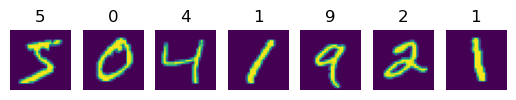

In [4]:
fig, ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

### Dataset structure

We have a total of 6000 training images and 1000 testing images. Its important to split out the data for training and testing. We also want to do some data exploration  to get a better idea of what our data looks like.

Each sample is a tuple in the following structure:

* First element is the actual image of a digit, represented by a tensor of shape 1x28x28
* Second element is a `label` that specifies whcih digit is represented by the tensor. It is a tensor that contains a number from 0 to 9

`data_train` is a training dataset that we will to train our model on, and `data_test` is s smaller test dataset that we can use to verify our model.

In [5]:
print('Training samples:', len(data_train))
print('Test samples:', len(data_test))

print('Tensor size:', data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


All pixel intensities of the images are represented by floating-point values in between 0 and 1:

In [6]:
print('Min intensity value:', data_train[0][0].min().item())
print('Max intensity value:', data_train[0][0].max().item())

Min intensity value: 0.0
Max intensity value: 1.0


### Loading your own images

In most of the practical applications, you would have your own images located on disk that you want to use to train your neural network. In thie case, you need to load them into PyTorch tensors.

One of the ways to do that is to use one of the Python libraries for image manipulation, such as Open CV, or PIL/Pillow, or imageio. Once you load your images into numpy array, you can easily convert it to tensors.

 >Notes: It is important to make sure all values are scaled to the range [0..1] before you pass them to a neural network - it is the usual convention for data preparation, and all default weight initilizations in neural networks are designed to work with this range. `ToTensor` transform that we seen above automatically scales PIL/numpy images with integer pixel values into [0..1] range.

Even better appraoch is to use functionality in `Torchvision` library, namely `ImageFolder`. It does all the preprocessing steps automatically, and also assigns labels to images according to the directory structure.


Neural networks work with tensors, and before training any models we need to convert our dataset into a set of tensors. This will open require we have loaded training and test datasets, and we are ready to start training our first neural network.